In [1]:
# Team: Lauren Butcher & Surena Nokham
# Week 9: Milestone 4 - Finalizing Results
# Date: 2/11/2023

# Milestone 4

**This is an exploratory data analysis of the Most Streamed Spotify Songs in 2023 dataset, aiming to uncover what makes a song successful on Spotify.**

- **Business Problem:** Predict future streaming trends, understand factors influencing song popularity, and explore user preferences

- **Problem Statement:** Predict the popularity of a song based on various features using the dataset of the most streamed Spotify songs of 2023.

- **Businesses that could find the analyzed information useful:**
    1. Music Labels and Artists Management
    2. Streaming Platforms (e.g., Spotify, Apple Music)
    3. Advertisers and Marketers
    4. Event Organizers and Concert Promoters
    5. Investors in the Music Industry
    6. Technology and AI Development Companies

## Table of Contents 
- Double click on the links below to jump to specific sections within the notebook

[Dataset_Information](#Dataset_Information)

[EDA](#EDA)

[Visualizations](#Visualizations)

[Linear_Regression](#Linear_Regression)

[Decision_Tree](#Decision_Tree)

[CNN](#CNN)

# WEEK 9 - MILESTONE 4: FINALIZING RESULTS

**In Milestone 4, most of the technical work for the project should be done. You should include the information from Milestone 3 and address the following additional items:**
1. Explain your process for prepping the data
2. Build and evaluate at least one model
3. Interpret your results
4. Begin to formulate a conclusion/recommendations

In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr

# Dataset Information <a id="Dataset_Information"></a>

In [3]:
# Load csv with specified encoding
df = pd.read_csv('Spotify_dataset.csv', encoding='latin1')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 836 entries, 0 to 835
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   track_name            836 non-null    object 
 1   artist(s)_name        836 non-null    object 
 2   artist_count          836 non-null    int64  
 3   released_year         836 non-null    int64  
 4   released_month        836 non-null    int64  
 5   released_day          836 non-null    int64  
 6   in_spotify_playlists  836 non-null    int64  
 7   in_spotify_charts     836 non-null    int64  
 8   streams               836 non-null    int64  
 9   in_apple_playlists    836 non-null    int64  
 10  in_apple_charts       836 non-null    int64  
 11  in_deezer_playlists   836 non-null    int64  
 12  in_deezer_charts      836 non-null    int64  
 13  in_shazam_charts      788 non-null    float64
 14  bpm                   836 non-null    int64  
 15  key                   7

In [5]:
# Check for null values in columns
df.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        48
bpm                      0
key                     88
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

In [6]:
# View df stat
df.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,836.000000,836.000000,836.000000,836.000000,836.000000,836.000000,8.360000e+02,836.000000,836.000000,836.000000,836.000000,788.000000,836.000000,836.000000,836.000000,836.000000,836.000000,836.000000,836.000000,836.000000
mean,1.516746,2018.039474,6.087321,13.793062,5554.505981,12.456938,5.375635e+08,69.893541,53.583732,422.220096,2.650718,64.930203,122.520335,66.400718,50.284689,63.723684,26.961722,1.790670,18.027512,10.019139
std,0.843975,11.102015,3.583834,9.214100,8287.827405,20.267417,5.856105e+08,88.513225,51.741008,1199.447395,6.061759,170.937029,28.440813,14.860016,23.558571,16.723792,26.310872,8.958211,13.209975,9.803806
min,1.000000,1942.000000,1.000000,1.000000,31.000000,0.000000,2.762000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.000000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2019.750000,3.000000,5.000000,896.750000,0.000000,1.482310e+08,13.000000,8.000000,13.000000,0.000000,0.000000,99.000000,56.000000,31.000000,53.000000,5.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2333.500000,3.000000,3.015560e+08,36.000000,40.000000,45.000000,0.000000,3.000000,120.000000,68.000000,50.000000,65.000000,17.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,21.000000,6087.750000,17.000000,7.044957e+08,92.250000,88.000000,180.250000,2.000000,40.000000,142.000000,78.000000,68.250000,76.250000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,3.703895e+09,672.000000,275.000000,12367.000000,58.000000,1451.000000,206.000000,96.000000,97.000000,97.000000,97.000000,91.000000,92.000000,59.000000


# EDA <a id="EDA"></a>

In [7]:
df = df.rename(columns=({'danceability_%':'danceability'}))
df = df.rename(columns=({'valence_%':'valence'}))
df = df.rename(columns=({'energy_%':'energy'}))
df = df.rename(columns=({'acousticness_%':'acousticness'}))
df = df.rename(columns=({'instrumentalness_%':'instrumentalness'}))
df = df.rename(columns=({'liveness_%':'liveness'}))
df = df.rename(columns=({'speechiness_%':'speechiness'}))

In [8]:
# Replace missing values in the "in_shazam_charts" column with "0"
df["in_shazam_charts"].fillna(0,inplace=True)
df.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts         0
bpm                      0
key                     88
mode                     0
danceability             0
valence                  0
energy                   0
acousticness             0
instrumentalness         0
liveness                 0
speechiness              0
dtype: int64

In [9]:
# Remove row with values that can't be converted to integers
df = df[df['streams'].astype(str).str.isdigit()]

# Convert streams column into integer data type
df['streams'] = df['streams'].astype(float)


In [10]:
# Remove specific columns
columns_to_drop = ['in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts']
df = df.drop(columns=columns_to_drop)

In [11]:
# Count occurrence of artist
artist_counts = df['artist(s)_name'].value_counts()
artist_counts.head(20)

Taylor Swift        30
The Weeknd          21
SZA                 19
Harry Styles        17
Bad Bunny           15
Kendrick Lamar      12
Ed Sheeran           9
BTS                  8
Drake, 21 Savage     8
Olivia Rodrigo       7
Labrinth             7
Morgan Wallen        7
Doja Cat             6
NewJeans             6
Feid                 6
Billie Eilish        5
IVE                  4
Adele                4
Drake                4
Karol G              4
Name: artist(s)_name, dtype: int64

In [12]:
# Identify most streamed songs
most_streamed_songs = df.sort_values(by='streams', ascending=False).head(20)
print("Top 10 Most Streamed Songs:")
most_streamed_songs[['track_name', 'artist(s)_name', 'streams']]

Top 10 Most Streamed Songs:


,track_name,artist(s)_name,streams
83,Blinding Lights,The Weeknd,3.703895e+09
621,Shape of You,Ed Sheeran,3.562544e+09
653,Someone You Loved,Lewis Capaldi,2.887242e+09
155,Dance Monkey,Tones and I,2.864792e+09
691,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2.808097e+09
509,One Dance,"Drake, WizKid, Kyla",2.713922e+09
677,STAY (with Justin Bieber),"Justin Bieber, The Kid Laroi",2.665344e+09
70,Believer,Imagine Dragons,2.594040e+09
131,Closer,"The Chainsmokers, Halsey",2.591224e+09
672,Starboy,"The Weeknd, Daft Punk",2.565530e+09


In [13]:
# Identify the most streamed artists
most_streamed_artists = df.groupby('artist(s)_name')['streams'].sum().reset_index()
most_streamed_artists = most_streamed_artists.sort_values(by='streams', ascending=False).head(20)
print("\nTop 10 Most Streamed Artists:")
most_streamed_artists


Top 10 Most Streamed Artists:


,artist(s)_name,streams
501,The Weeknd,1.412175e+10
147,Ed Sheeran,1.390895e+10
487,Taylor Swift,1.283394e+10
205,Harry Styles,1.160865e+10
37,Bad Bunny,7.779840e+09
382,Olivia Rodrigo,7.442149e+09
156,Eminem,6.183806e+09
66,Bruno Mars,5.846921e+09
211,Imagine Dragons,5.272485e+09
301,Lewis Capaldi,4.734698e+09


In [14]:
# Count occurrence of key values
key_counts = df['key'].value_counts()
key_counts

C#    110
G      85
G#     80
F      78
D      71
B      68
A      65
F#     58
E      55
A#     50
D#     28
Name: key, dtype: int64

In [15]:
# Count occurrence of key values
mode_counts = df['mode'].value_counts()
mode_counts

Major    491
Minor    345
Name: mode, dtype: int64

In [16]:
# Count occurrence of key values
bpm_counts = df['bpm'].value_counts()
bpm_counts.head(20)

120    36
140    27
130    23
110    23
92     21
150    20
105    17
90     16
125    16
96     16
122    15
100    15
94     14
170    14
95     13
128    13
134    12
144    12
98     12
93     11
Name: bpm, dtype: int64

# Visualizations <a id="Visualizations"></a>

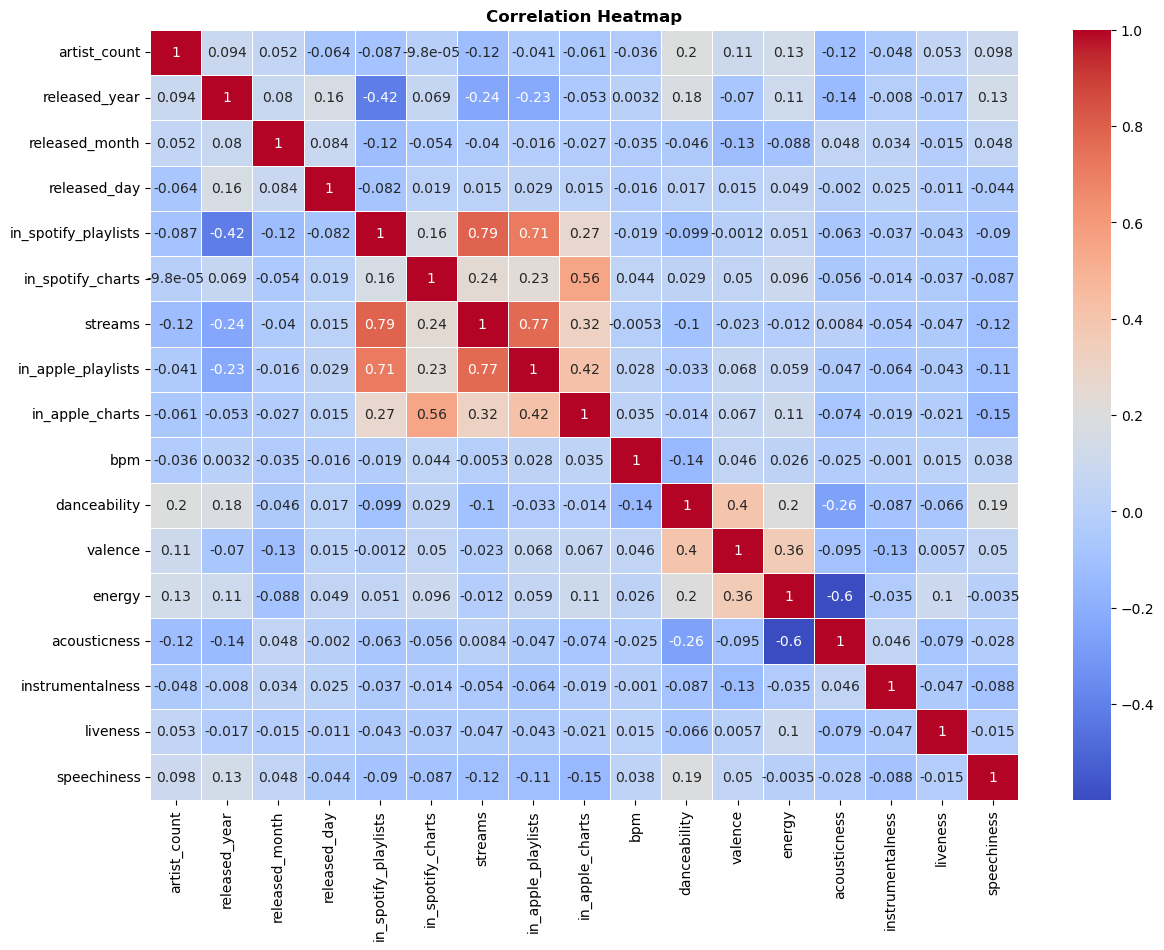

In [17]:
# Drop non-numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the c.m.
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap', weight='bold')
plt.show()

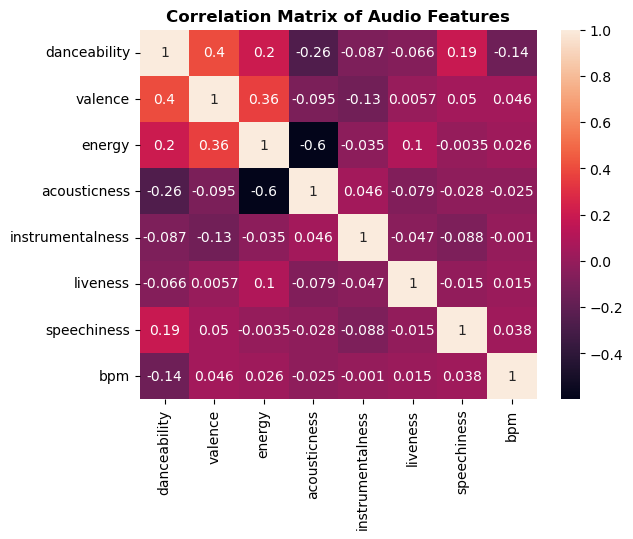

In [18]:
# Plot correlation matrix of audio features
feature_columns = ["danceability", "valence", "energy", "acousticness", "instrumentalness", "liveness", "speechiness", 'bpm']
feature_matrix = df[feature_columns].corr()
sns.heatmap(feature_matrix,annot = True)
plt.title("Correlation Matrix of Audio Features", weight='bold')
plt.show()

**Observations:**
- Energy and acousticness are negatively correlated
- Valence and danceability are strongly correlated

In [19]:
# Define ranges of BPM values & calculate the mean
values_bpm = [
    df.loc[(df["bpm"]>=65) & (df["bpm"]<=105)]["streams"].mean(),
    df.loc[(df["bpm"]>=106) & (df["bpm"]<=125)]["streams"].mean(),
    df.loc[(df["bpm"]>=126) & (df["bpm"]<=145)]["streams"].mean(),
    df.loc[(df["bpm"]>=146) & (df["bpm"]<=165)]["streams"].mean(),
    df.loc[(df["bpm"]>=166) & (df["bpm"]<=185)]["streams"].mean(),
    df.loc[(df["bpm"]>=186) & (df["bpm"]<=206)]["streams"].mean(),
]

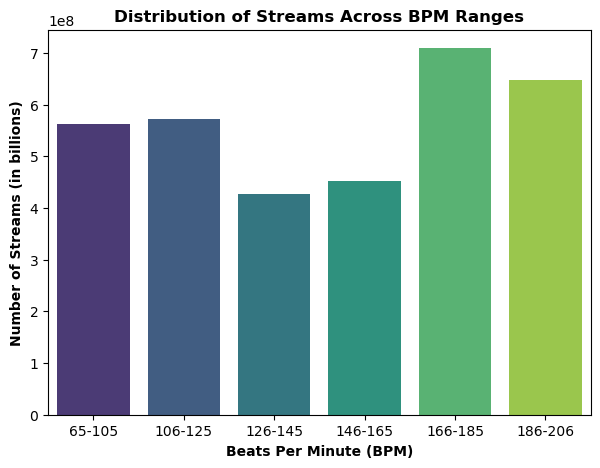

In [20]:
# Plotting a bar graph
plt.figure(figsize=(7, 5))
labels_bpm = ["65-105","106-125","126-145","146-165","166-185","186-206"]
sns.barplot(x =labels_bpm,y=values_bpm, palette='viridis')
plt.title("Distribution of Streams Across BPM Ranges", weight='bold')
plt.xlabel("Beats Per Minute (BPM)", weight='bold')
plt.ylabel("Number of Streams (in billions)", weight='bold')
plt.show()

**Observation:**
- The songs with bpm in the range of 166-185 have the most number of streams
- The songs with bpm in the range of 126-145 have the least number of streams

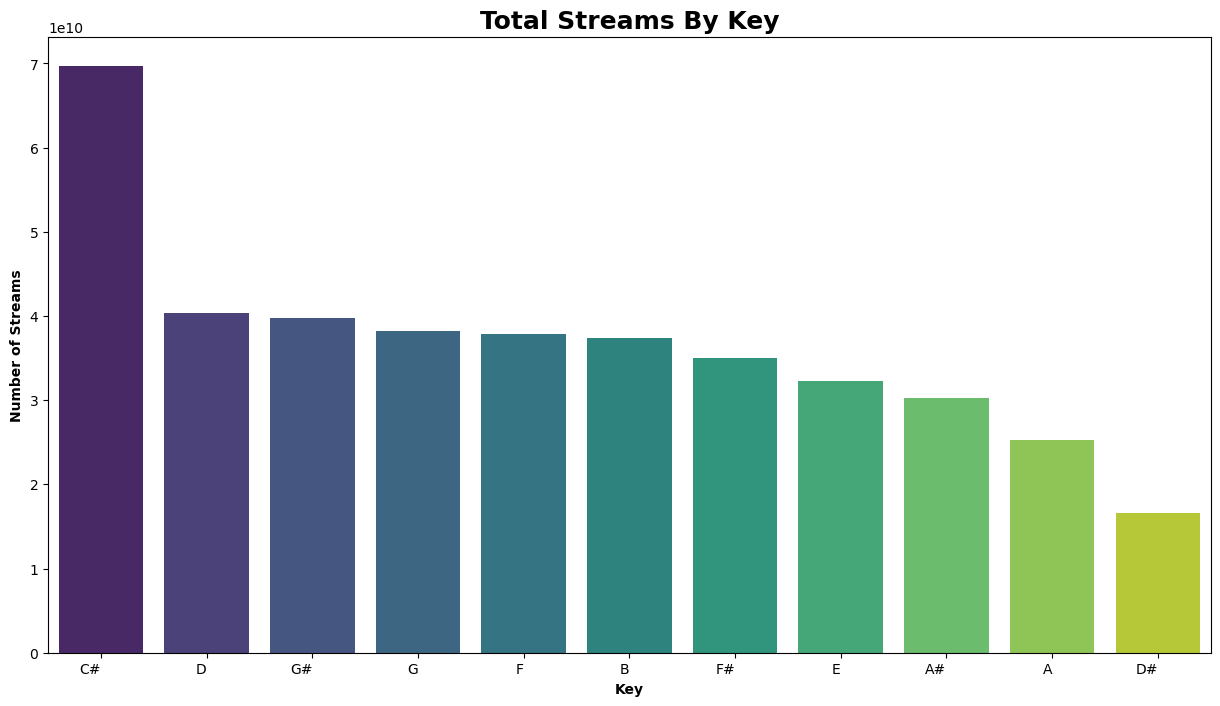

In [21]:
# Calculate average of key streams
key_streams = df.groupby('key')['streams'].sum().sort_values(ascending=False)

# Plot the bar graph
plt.figure(figsize=(15, 8))
sns.barplot(x=key_streams.index, y=key_streams.values, palette='viridis')

plt.title('Total Streams By Key', fontsize=18, weight='bold')
plt.xlabel('Key', weight='bold')
plt.ylabel('Number of Streams', weight='bold')
plt.xticks(rotation=0, ha='right')

plt.show()

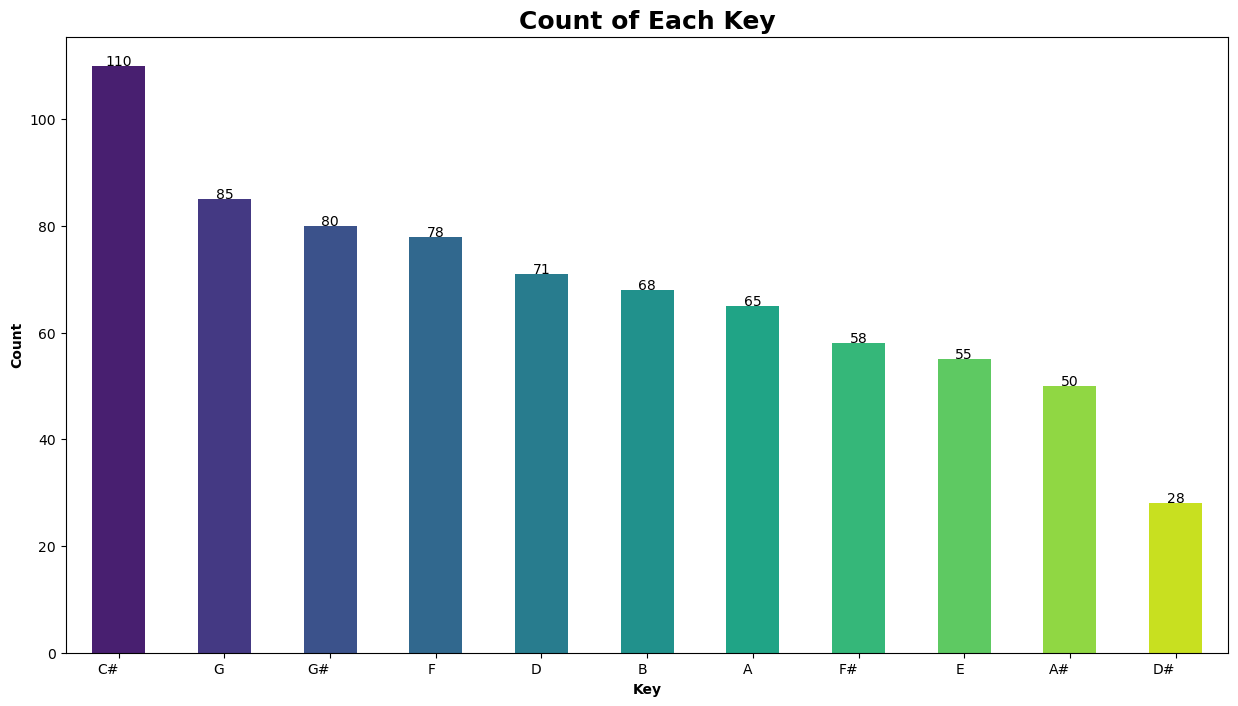

In [22]:
# Set the color palette
colors = sns.color_palette("viridis", len(key_counts))

# Plot the bar graph with the specified color palette
plt.figure(figsize=(15, 8))
bars = key_counts.plot(kind='bar', color=colors)
plt.title('Count of Each Key', fontsize=18, weight='bold')
plt.xlabel('Key', weight='bold')
plt.ylabel('Count', weight='bold')
plt.xticks(rotation=0, ha='right')

# Annotate each bar with its count
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, str(int(bar.get_height())), ha='center')

plt.show()

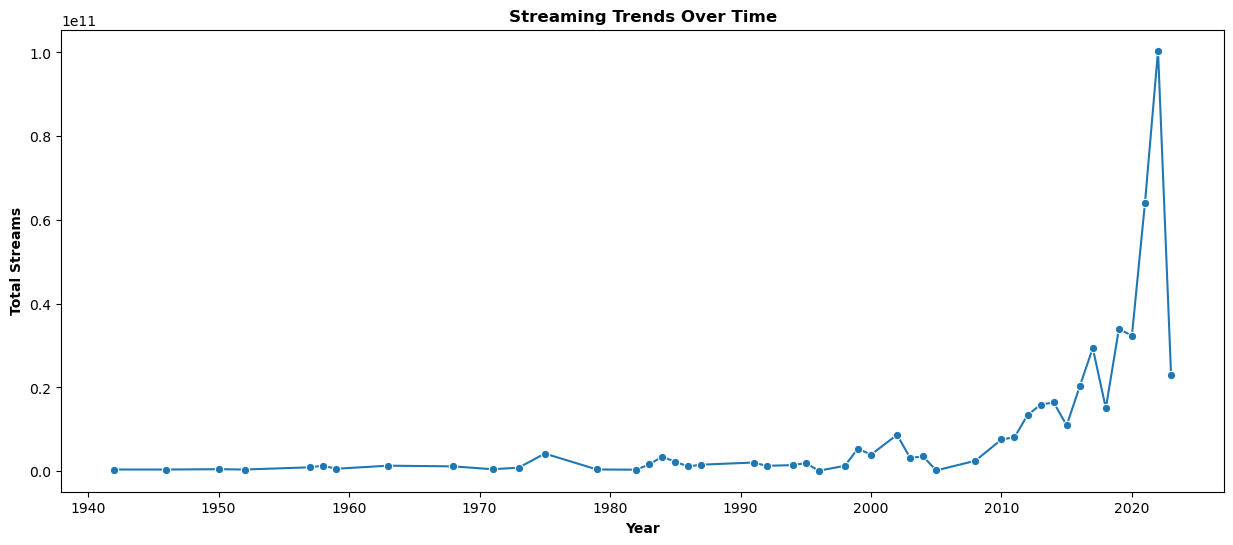

In [23]:
# Plot trends in streaming over time
streaming_trends_over_time = df.groupby('released_year')['streams'].sum().reset_index()
plt.figure(figsize=(15, 6))
sns.lineplot(x='released_year', y='streams', data=streaming_trends_over_time, marker='o')
plt.title('Streaming Trends Over Time', weight='bold')
plt.xlabel('Year', weight='bold')
plt.ylabel('Total Streams', weight='bold')
plt.show()

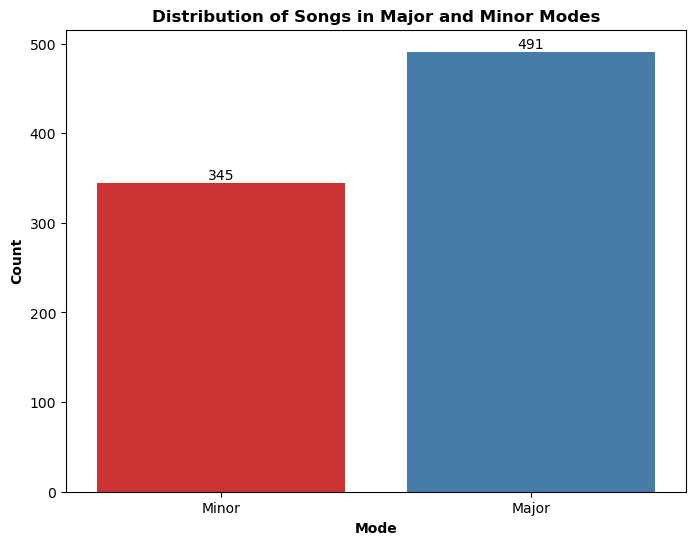

In [24]:
# Plot bar graph
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='mode', data=df, palette='Set1')
for container in ax.containers:
    ax.bar_label(container)
    
plt.title('Distribution of Songs in Major and Minor Modes', weight='bold')
plt.xlabel('Mode', weight='bold')
plt.ylabel('Count', weight='bold')
plt.show()

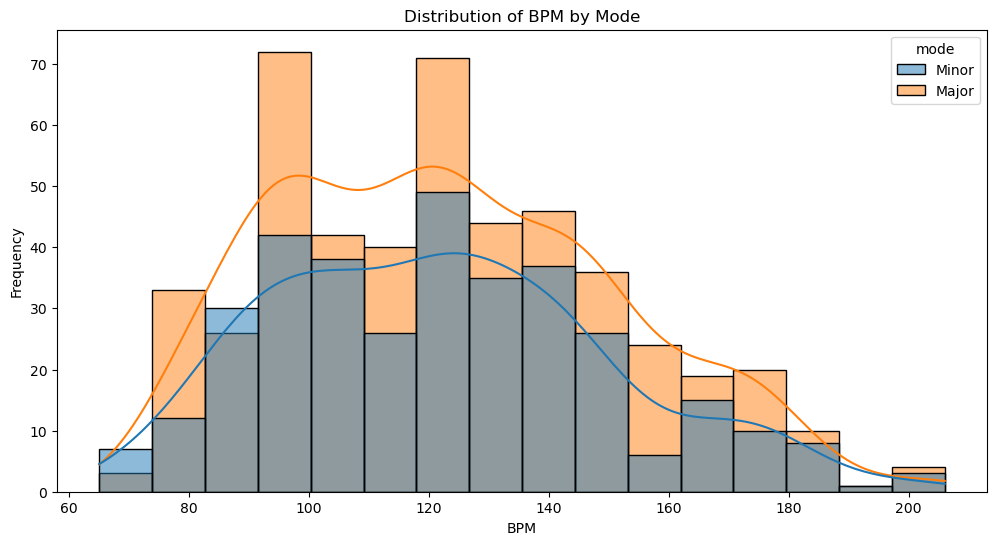

In [25]:
# Distribution of BPM by Mode:
plt.figure(figsize=(12, 6))
sns.histplot(x='bpm', data=df, hue='mode', kde=True)
plt.title('Distribution of BPM by Mode')
plt.xlabel('BPM')
plt.ylabel('Frequency')
plt.show()

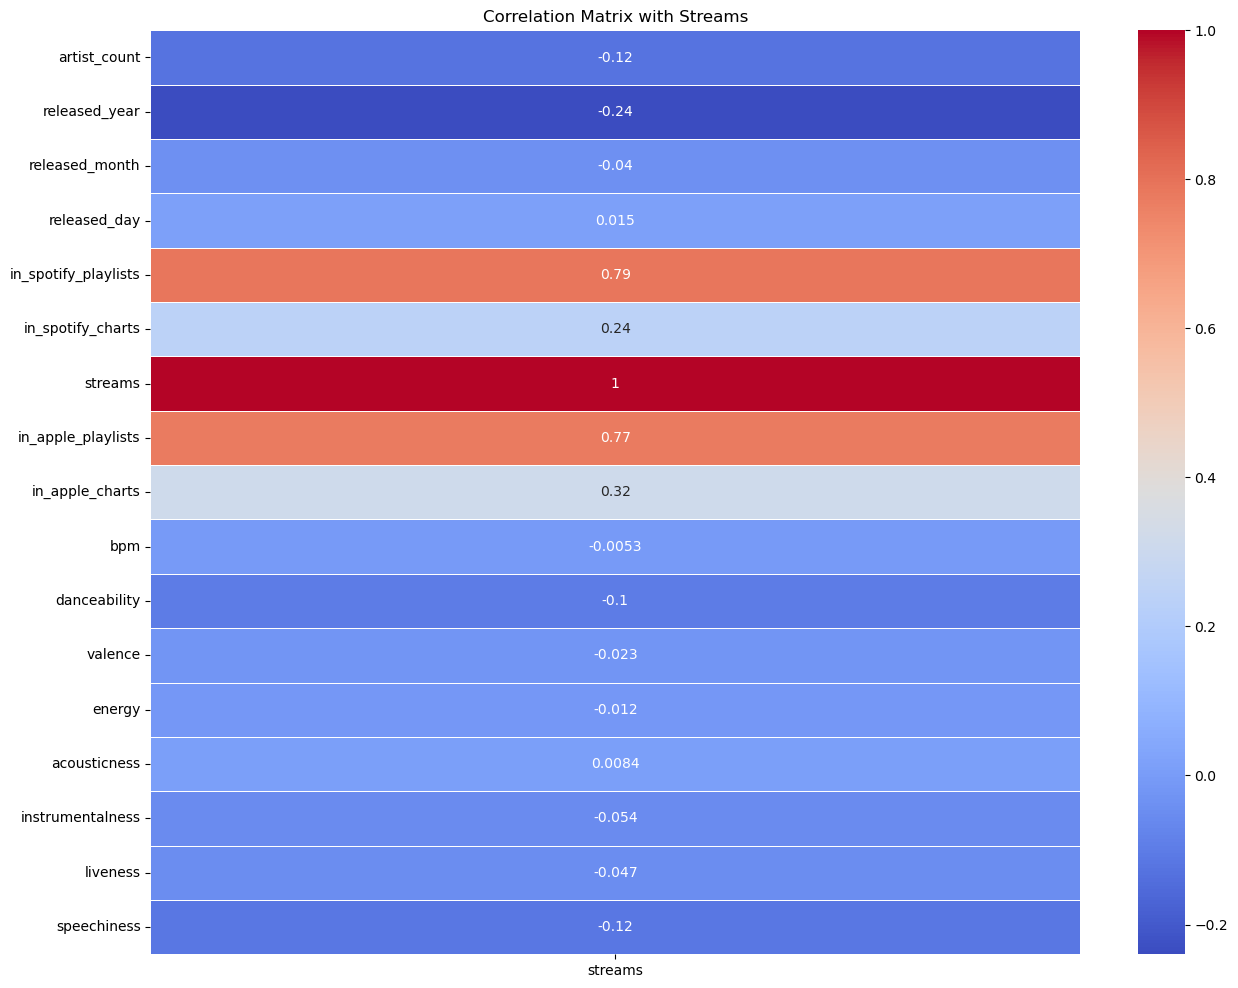

In [26]:
# Explore correlations between song attributes and popularity
correlation_matrix = df.corr()
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix[['streams']], annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix with Streams')
plt.show()


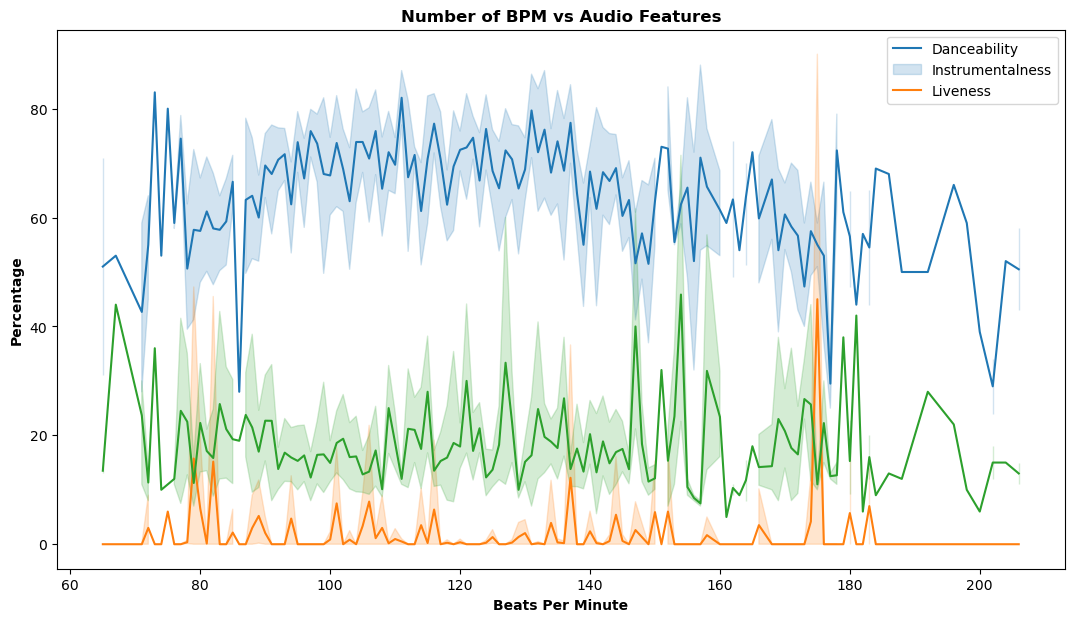

In [27]:
# Set figure size
plt.figure(figsize=(13, 7))

# Set the title and axis labels
plt.title("Number of BPM vs Audio Features", weight='bold')
plt.xlabel("Beats Per Minute", weight='bold')
plt.ylabel("Percentage", weight='bold')

# Plot lines for features against bpm
sns.lineplot(x=df["bpm"].tolist(), y=df["danceability"].tolist())
sns.lineplot(x=df["bpm"].tolist(), y=df["instrumentalness"].tolist())
sns.lineplot(x=df["bpm"].tolist(), y=df["liveness"].tolist())

# Add a legend to the plot
plt.legend(["Danceability", "Instrumentalness", "Liveness"], loc="upper right")

# Display plot
plt.show()

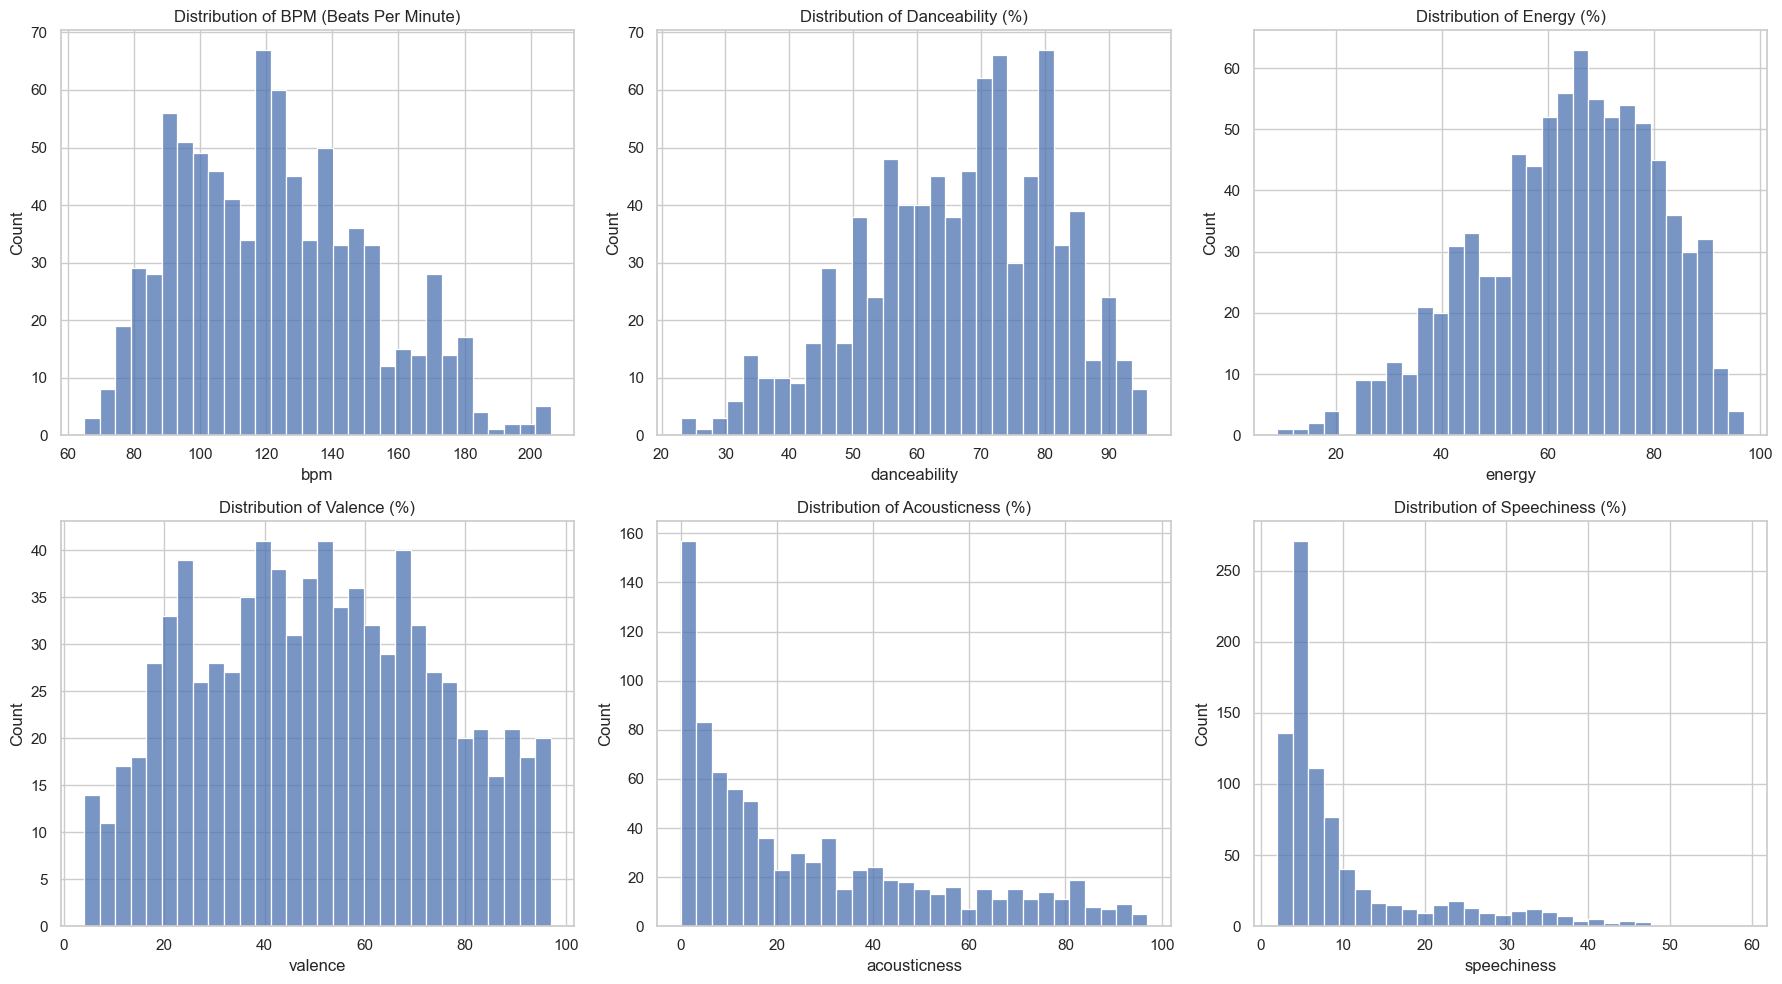

In [28]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

# BPM (Beats Per Minute)
sns.histplot(df['bpm'], bins=30, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of BPM (Beats Per Minute)')

# Danceability
sns.histplot(df['danceability'], bins=30, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Danceability (%)')

# Energy
sns.histplot(df['energy'], bins=30, ax=axes[0, 2])
axes[0, 2].set_title('Distribution of Energy (%)')

# Valence
sns.histplot(df['valence'], bins=30, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Valence (%)')

# Acousticness
sns.histplot(df['acousticness'], bins=30, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Acousticness (%)')

# Speechiness
sns.histplot(df['speechiness'], bins=30, ax=axes[1, 2])
axes[1, 2].set_title('Distribution of Speechiness (%)')

plt.tight_layout()
plt.show()

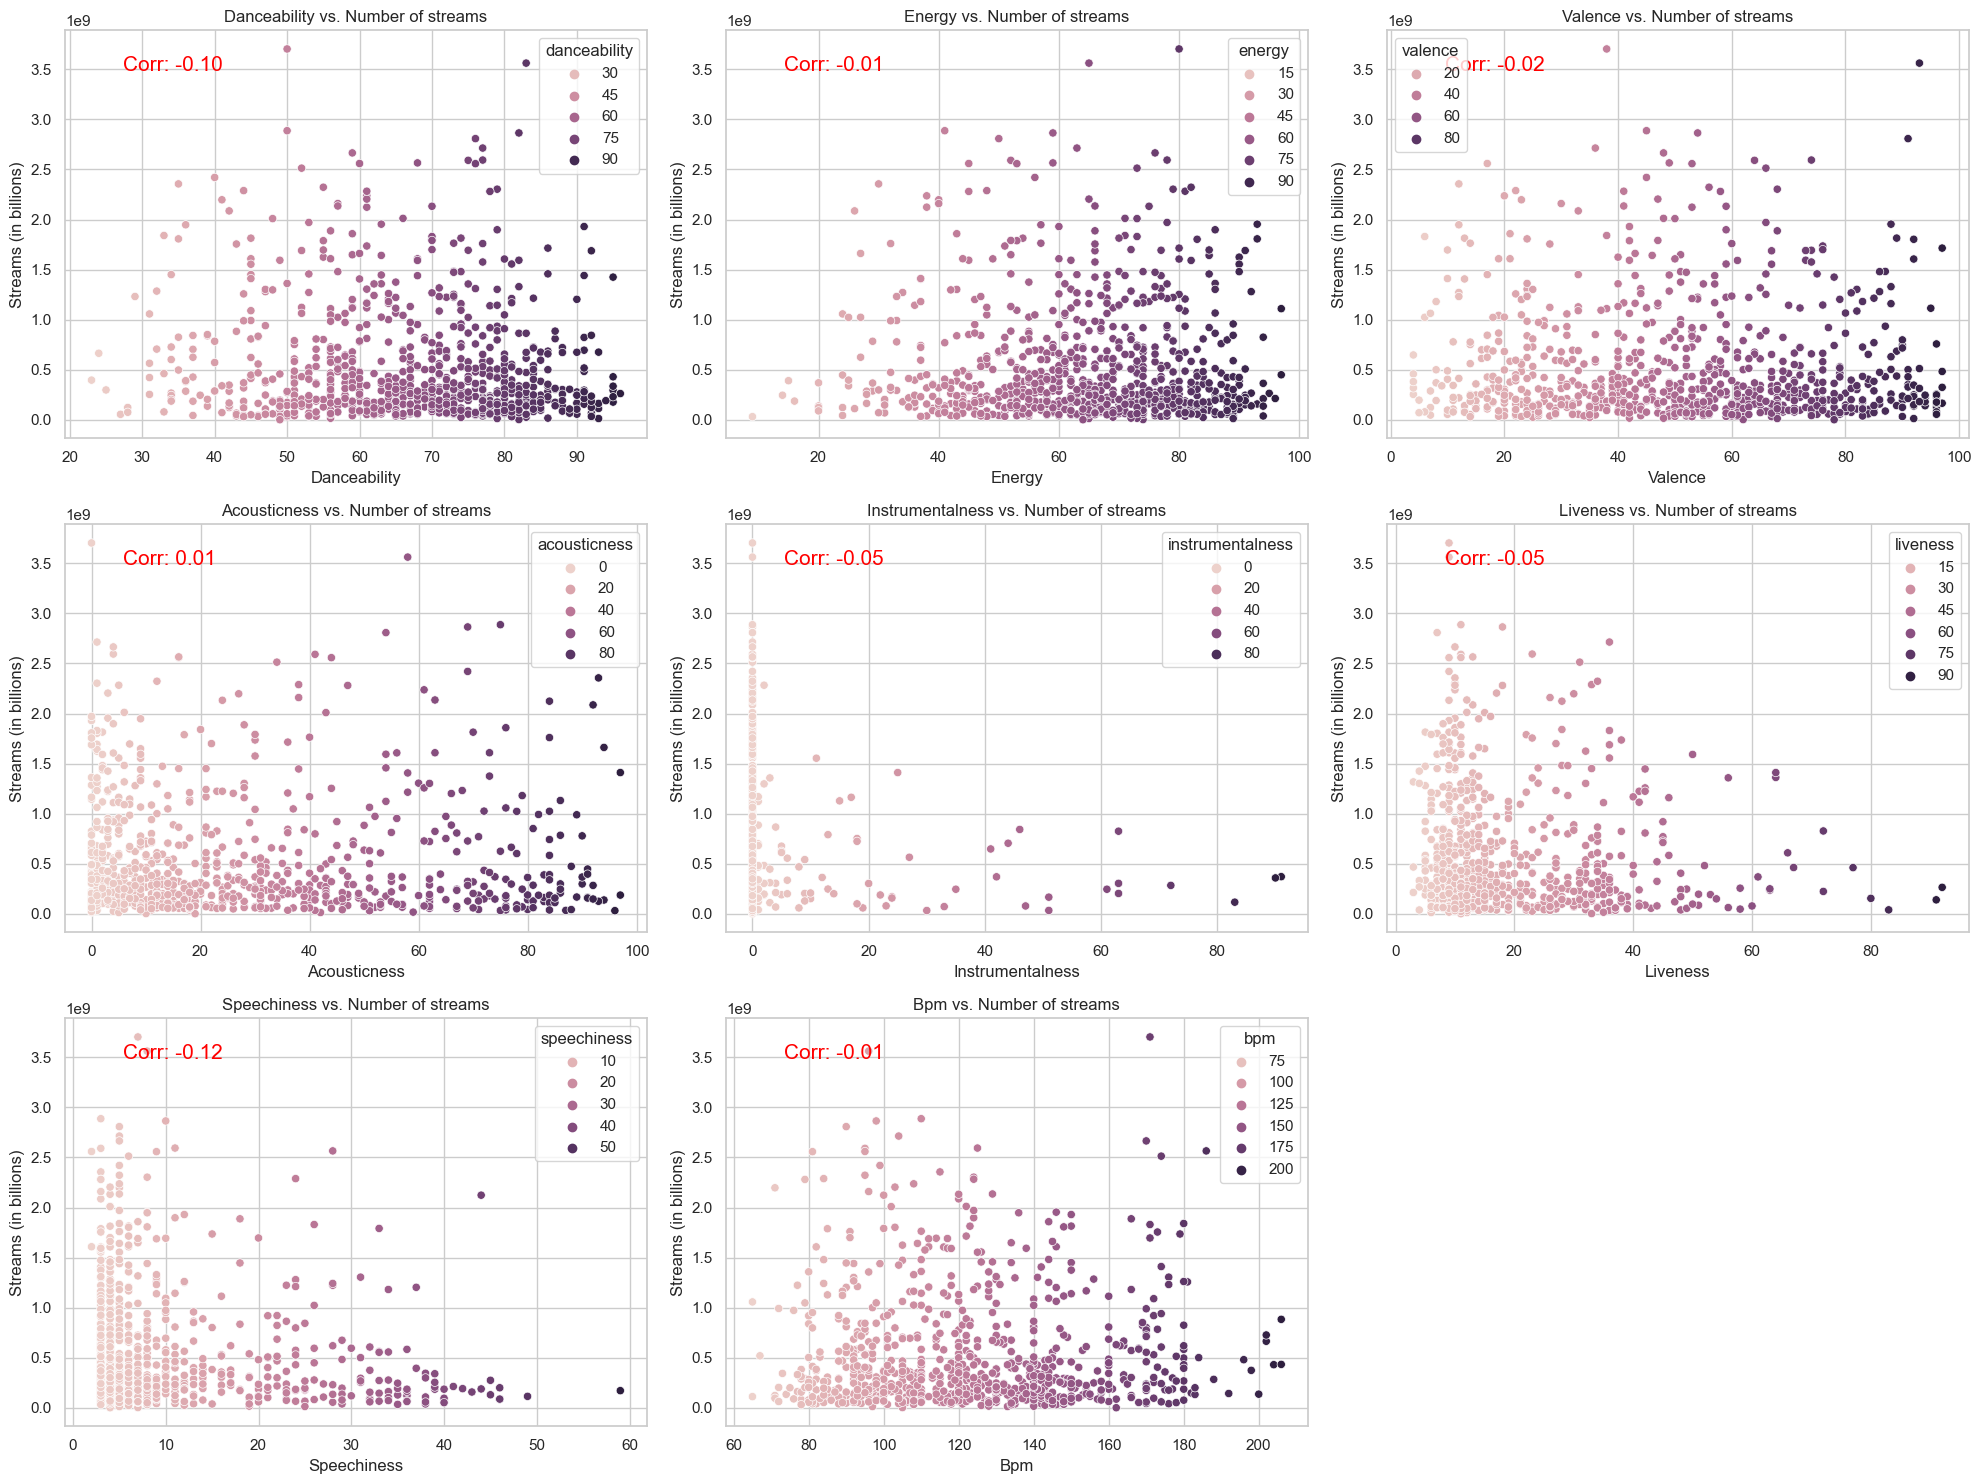

In [29]:
# Select features to compare
features_columns = ['danceability', 'energy', 'valence', "acousticness",  "instrumentalness", "liveness", "speechiness", "bpm"]

# Create scatterplot
plt.figure(figsize=(20, 15))
for i, feature in enumerate(features_columns, start=1):
    plt.subplot(3, 3, i)
    plt.title(feature.replace("_%", "").capitalize() + " vs. Number of streams")
    plt.ylabel('Streams (in billions)')
    plt.xlabel(feature.replace("_%", "").capitalize())
    
    # Scatterplot
    sns.scatterplot(x=df[feature], y=df['streams'], hue=df[feature])
    
    # Calculate correlation coefficient
    correlation_coefficient, _ = pearsonr(df[feature], df['streams'])
    
    # Annotate the plot with correlation coefficient in the top left corner
    plt.annotate(f'Corr: {correlation_coefficient:.2f}', xy=(0.1, 0.9), xycoords='axes fraction', fontsize=15, color='red')

plt.tight_layout()
plt.show()

**Streams vs. Danceability:** −0.11
- Interpretation: There is a weak negative correlation between danceability and the number of streams. As danceability decreases, the number of streams tends to slightly decrease.

**Energy:** -0.03
- Interpretation: There is a very weak negative correlation between energy and the number of streams. As energy decreases, the number of streams tends to slightly decrease.

**Valence:** -0.04
- Interpretation: There is a very weak negative correlation between valence (positivity of musical content) and the number of streams. As valence decreases, the number of streams tends to slightly decrease.

**Acousticness:** -0.00
- Interpretation: There is an extremely weak negative correlation between acousticness and the number of streams. The correlation is almost negligible.

**Instrumentalness:** -0.04
- Interpretation: There is a weak negative correlation between instrumentalness and the number of streams. As instrumentalness increases (indicating a more instrumental and less vocal composition), there is a slight tendency for the number of streams to decrease. 

**Liveness:** -0.05
- Interpretation: There is a very weak negative correlation between liveness (presence of live performance elements) and the number of streams. As liveness decreases, the number of streams tends to slightly decrease.

**Speechiness:** -0.11
- Interpretation: There is a weak negative correlation between speechiness (amount of spoken words in the song) and the number of streams. As speechiness decreases, the number of streams tends to slightly decrease.

**BPM:** -0.00
- Interpretation: There is an extremely weak correlation between BPM and the number of streams. The beats per minute (tempo) of a song shows almost no linear correlation with the number of streams it receives. This suggests that factors beyond tempo play a more prominent role in determining a song's popularity in terms of streams.

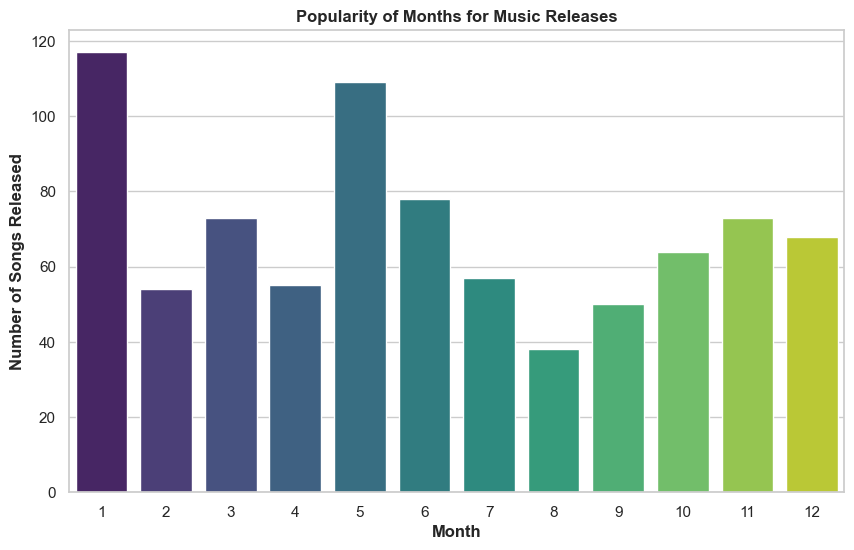

In [30]:
# Assuming 'released_month' is the column containing the month of release
plt.figure(figsize=(10, 6))
sns.countplot(x="released_month", data=df, palette="viridis")
plt.title("Popularity of Months for Music Releases", weight='bold')
plt.xlabel("Month", weight='bold')
plt.ylabel("Number of Songs Released", weight='bold')
plt.show()

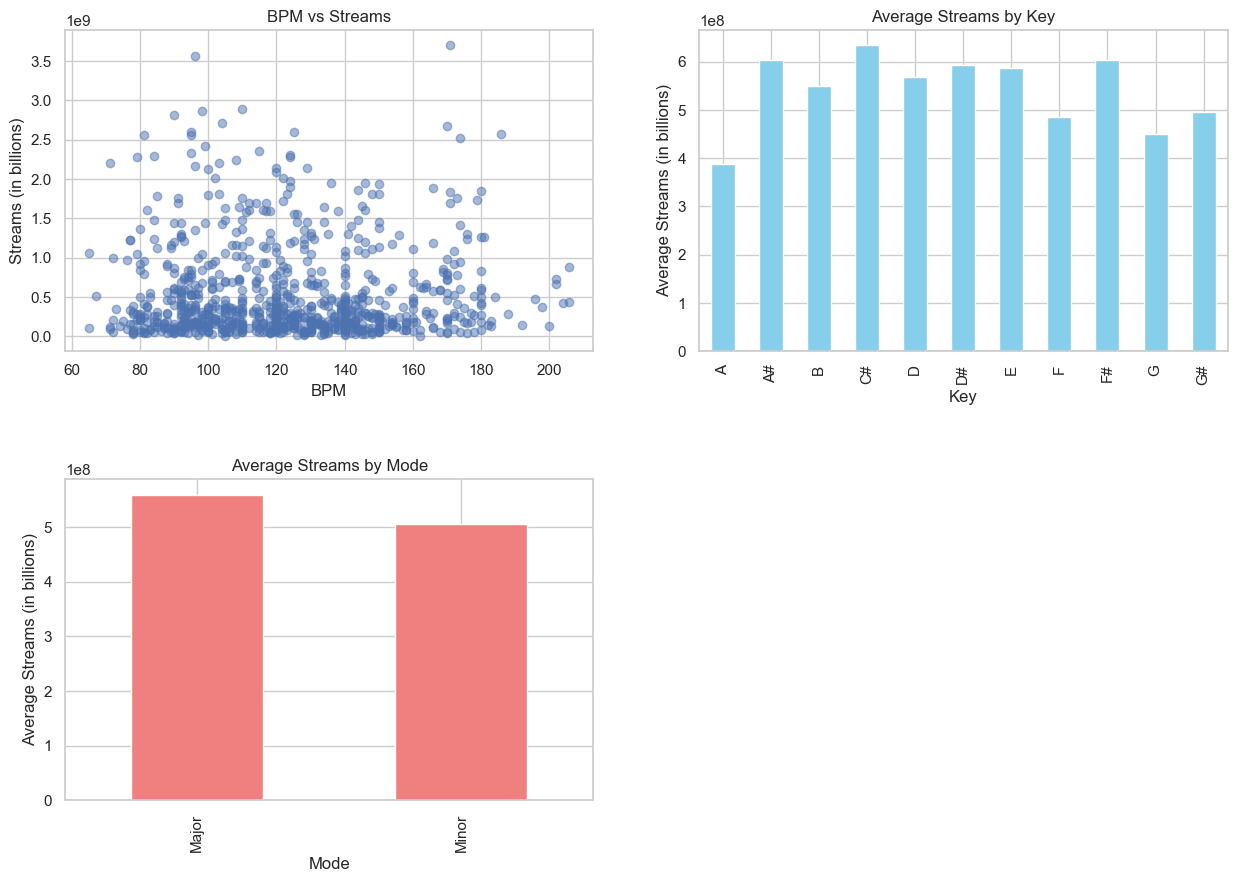

In [31]:
# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
fig.subplots_adjust(hspace=0.4)

# Scatter Plot: BPM vs Streams
axes[0, 0].scatter(df['bpm'], df['streams'], alpha=0.5)
axes[0, 0].set_title('BPM vs Streams')
axes[0, 0].set_xlabel('BPM')
axes[0, 0].set_ylabel('Streams (in billions)')

# Bar Plot: Key vs Average Streams
avg_streams_by_key = df.groupby('key')['streams'].mean()
avg_streams_by_key.plot(kind='bar', ax=axes[0, 1], color='skyblue')
axes[0, 1].set_title('Average Streams by Key')
axes[0, 1].set_xlabel('Key')
axes[0, 1].set_ylabel('Average Streams (in billions)')

# Bar Plot: Mode vs Average Streams
avg_streams_by_mode = df.groupby('mode')['streams'].mean()
avg_streams_by_mode.plot(kind='bar', ax=axes[1, 0], color='lightcoral')
axes[1, 0].set_title('Average Streams by Mode')
axes[1, 0].set_xlabel('Mode')
axes[1, 0].set_ylabel('Average Streams (in billions)')


# Hide the empty subplot
axes[1, 1].axis('off')

plt.show()

**Findings:**
- The Weekend holds the record for the highest total number of streams and boasts the most-streamed song, "Blinding Lights
- Songs within the BPM range of 166-185 are more likely to achieve success, indicating a correlation between beats per minute and popularity.
- A noticeable decline in danceability is observed for songs with a BPM around 85-90, suggesting a potential impact on listener engagement at that tempo.
- A substantial increase in liveliness is noted for songs with a BPM around 170-175, indicating a positive correlation between tempo and the liveliness of a track.
- Higher levels of speechiness and instrumentalness in a song are associated with lower stream counts, suggesting that these features may contribute to decreased popularity.
- The valence of a song, indicating its overall positivity, tends to be positively correlated with its danceability. In simpler terms, more positive songs are typically more danceable, creating a correlation between the emotional tone of the music and its likelihood to inspire dance or movement.
- Users are less likely to listen to Live songs, songs with more lyrics less music and songs with more music less lyrics
- January (1) and May (5) appear to be particularly popular months for song releases. This could be due to various reasons such as industry practices or seasonal trends.

# ML Model Implementation - Linear Regression <a id="Linear_Regression"></a>

In [32]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [33]:
# Split the dataset into features (X) and the target variable (y)
features = df.drop('streams', axis=1)
target = df['streams']

In [34]:
# Perform one-hot encoding on categorical columns
X_encoded = pd.get_dummies(features)

In [35]:
# # Split the dataset into training and testing sets (80% train, 20% test) with the new encoded features
X_train_encoded, X_test_encoded, y_train, y_test = train_test_split(X_encoded, target, test_size=0.2, random_state=42)

In [36]:
# Impute missing values in the training set using mean strategy
imputer = SimpleImputer(strategy='mean')
X_train_encoded_no_nan = imputer.fit_transform(X_train_encoded)

In [37]:
# Check for missing values in the target variable
if np.isnan(y_train).any():
    # Fill or remove missing values in the target variable
    y_train_no_nan = imputer.transform(y_train.values.reshape(-1, 1)).ravel()
else:
    # If there are no NaN values in the target variable, use the original values
    y_train_no_nan = y_train

In [38]:
# Create the Linear Regression model
model = LinearRegression()

In [39]:
# Train the model on the training set
model.fit(X_train_encoded, y_train_no_nan)

# Make predictions on the test set with encoded features
y_pred = model.predict(X_test_encoded)

In [40]:
from sklearn.metrics import mean_squared_error

# Evaluate the model
mean_squared_error_value = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mean_squared_error_value}')

Mean Squared Error: 1.830337370519918e+17


**Interpretation:** 
- The MSE value measures how well the linear regression model predicts the number of streams
- The MSE is very high (1.2057513064795e+17), indicating a substantial difference between the predicted and actual values. This suggests that the linear model is not be the best fit for this dataset, or there might be other factors influencing the number of streams that are not captured by the features in the model

In [41]:
# Calculate the coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_
print('Coefficients:', coefficients)
print('Intercept:', intercept)

Coefficients: [-33906719.59556846   2590768.90374952  35226008.78689545 ...
  82691291.41507025  22144199.14671706 -22144199.14671706]
Intercept: -5290225338.893358


**Interpretation:**
- There are a mix of positive coefficients (suggests a positive relationship with the number of streams) and negative coefficients (suggests a negative relationship).
- The intercept (-2698554197.2103496) is not directly interpretable but is a baseline value for the number of streams.
- This model did not perform well, likely due to the variables not being linearly related.

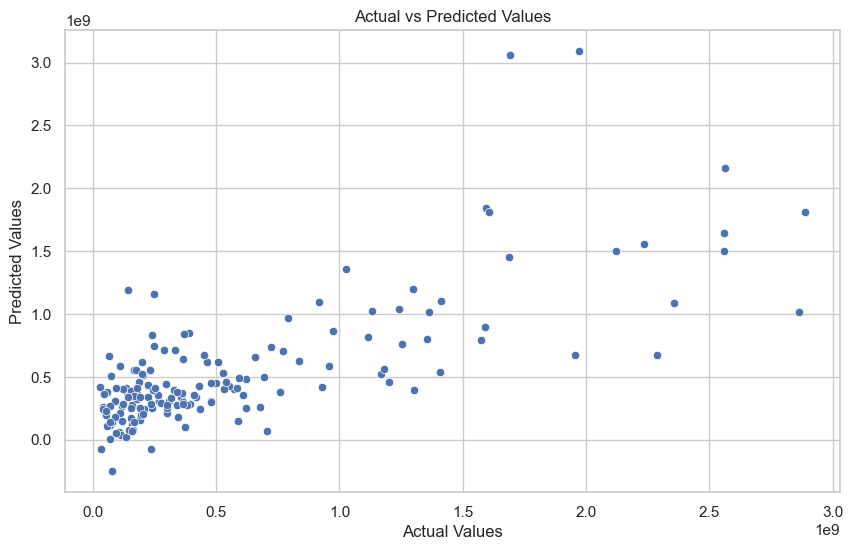

In [42]:
# Create a df with actual and predicted values
result_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Plotting the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual', y='Predicted', data=result_df)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

# ML Model Implementation - Decision Tree <a id="Decision_Tree"></a>

In [43]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

In [44]:
# Split the dataset into features (X) and the target variable (y)
features = df.drop('streams', axis=1)
target = df['streams']

In [45]:
# Perform one-hot encoding on categorical columns
categorical_columns = features.select_dtypes(include=['object']).columns
X_encoded = pd.get_dummies(features, columns=categorical_columns)

In [46]:
# Split the dataset into training and testing sets (80% train, 20% test) with the new encoded features
X_train_encoded, X_test_encoded, y_train, y_test = train_test_split(X_encoded, target, test_size=0.2, random_state=42)

In [47]:
# Handle missing values in X_train_encoded
imputer = SimpleImputer(strategy='mean')
X_train_encoded = imputer.fit_transform(X_train_encoded)

In [48]:
# Handle missing values in X_test_encoded
X_test_encoded = imputer.transform(X_test_encoded)

In [49]:
# Scale numeric features using StandardScaler
scaler = StandardScaler()
X_train_encoded_scaled = scaler.fit_transform(X_train_encoded)
X_test_encoded_scaled = scaler.transform(X_test_encoded)

In [50]:
# Create and train the decision tree model
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train_encoded_scaled, y_train)

DecisionTreeRegressor()

In [51]:
# Create and train the random forest model
rf_model = RandomForestRegressor()
rf_model.fit(X_train_encoded_scaled, y_train)

RandomForestRegressor()

In [52]:
# Make predictions on the test set with encoded and scaled features
tree_pred = tree_model.predict(X_test_encoded_scaled)
rf_pred = rf_model.predict(X_test_encoded_scaled)

In [53]:
# Evaluate the models
tree_mse = mean_squared_error(y_test, tree_pred)
tree_mae = mean_absolute_error(y_test, tree_pred)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_mae = mean_absolute_error(y_test, rf_pred)

In [54]:
# Print the evaluation metrics
print("Decision Tree testing mse = ", tree_mse, " & mae = ", tree_mae, " & rmse = ", sqrt(tree_mse))
print("Random Forest testing mse = ", rf_mse, " & mae = ", rf_mae, " & rmse = ", sqrt(rf_mse))

Decision Tree testing mse =  1.6422677009532397e+17  & mae =  236445300.7797619  & rmse =  405249022.3249453
Random Forest testing mse =  6.620387677601238e+16  & mae =  157458822.24666667  & rmse =  257301140.2540074


**Interpretation:**
- Both models have relatively high MSE values, indicating that there is a significant amount of variance between the actual and predicted values. This suggests that the models might not be capturing all the patterns in the data.
- The MAE represents the average absolute error in prediction. It gives a sense of the average magnitude of errors.
The RMSE provides an interpretation similar to the MAE but penalizes larger errors more.

# ML Model Implementation - Convolutional Neural Network (CNN) <a id="CNN"></a>

In [55]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten


# Split the dataset into features (X) and the target variable (y)
X = df.drop(['streams', 'track_name', 'artist(s)_name'], axis=1)  # Drop non-numeric and non-relevant columns
y = df['streams']

# Encode categorical variables using one-hot encoding
X = pd.get_dummies(df.drop(['streams', 'track_name', 'artist(s)_name'], axis=1))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape the data for CNN input (add one dimension)
X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

# Build the CNN model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1))  # Output layer with one neuron for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, verbose=1)

# Evaluate the model
y_pred = model.predict(X_test_reshaped)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Epoch 1/10
21/21 [==============================] - 1s 5ms/step - loss: 608874492529213440.0000
Epoch 2/10
21/21 [==============================] - 0s 5ms/step - loss: 608874492529213440.0000
Epoch 3/10
21/21 [==============================] - 0s 4ms/step - loss: 608874492529213440.0000
Epoch 4/10
21/21 [==============================] - 0s 4ms/step - loss: 608874423809736704.0000
Epoch 5/10
21/21 [==============================] - 0s 5ms/step - loss: 608874355090259968.0000
Epoch 6/10
21/21 [==============================] - 0s 4ms/step - loss: 608874286370783232.0000
Epoch 7/10
21/21 [==============================] - 0s 5ms/step - loss: 608874080212353024.0000
Epoch 8/10
21/21 [==============================] - 0s 4ms/step - loss: 608873805334446080.0000
Epoch 9/10
21/21 [==============================] - 0s 4ms/step - loss: 608873599176015872.0000
Epoch 10/10
6/6 [==============================] - 0s 4ms/step
Mean Squared Error: 7.214816880509636e+17
